In [13]:
import numpy as np

### Load our pretrained model

In [14]:
from tensorflow import keras

pretrained_model = keras.models.load_model('initially_trained_autoencoder.h5')

In [15]:
from tensorflow.keras.datasets import mnist


# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


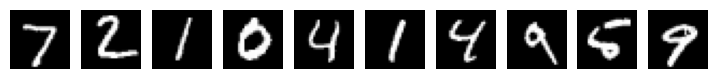

In [16]:
from matplotlib import pyplot as plt

n = 10
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(test_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')

plt.show()

313/313 [==============================] - 1s 3ms/step


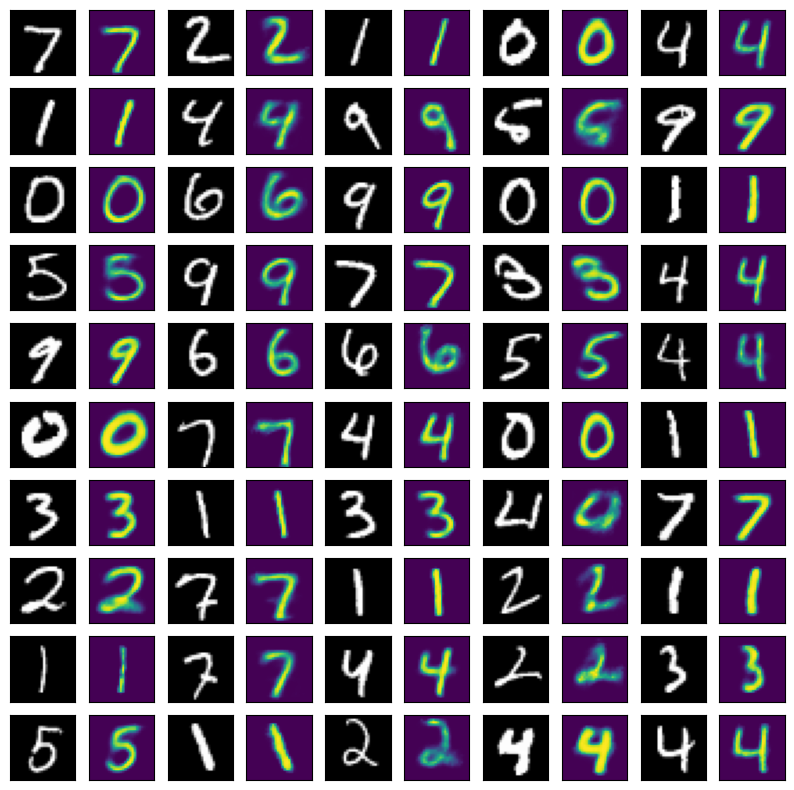

In [17]:
reconstructed_images = pretrained_model.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

In [18]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

input_dim = 28*28
latent_vec_len = 16 # this is the 'bottleneck' of the autoencoder

# Define the autoencoder architecture
# build the encoder
autoencoder = Sequential()
autoencoder.add(Input(shape=(input_dim,)))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(100, activation='relu'))

# the bottleneck layer
autoencoder.add(Dense(latent_vec_len, activation='relu'))

# the decoder layer
autoencoder.add(Dense(100, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(input_dim, activation='sigmoid'))

# Compile the autoencoder model
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

# Get summary
autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 500)               392500    
                                                                 
 dense_9 (Dense)             (None, 300)               150300    
                                                                 
 dense_10 (Dense)            (None, 100)               30100     
                                                                 
 dense_11 (Dense)            (None, 16)                1616      
                                                                 
 dense_12 (Dense)            (None, 100)               1700      
                                                                 
 dense_13 (Dense)            (None, 300)               30300     
                                                                 
 dense_14 (Dense)            (None, 500)              

In [19]:
from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training


# Train the autoencoder with MNIST data
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = autoencoder.fit(
    x=train_images, # For autoencoders, both the input and the target are the same
    y=train_images, 
    epochs=10, 
    batch_size=128,
    shuffle=True, 
    validation_data=(test_images, test_images),
    callbacks=[early_stop]
)



Epoch 1/10
469/469 [==============================] - 6s 11ms/step - loss: 0.1938 - val_loss: 0.1414
Epoch 2/10
469/469 [==============================] - 5s 11ms/step - loss: 0.1332 - val_loss: 0.1240
Epoch 3/10
469/469 [==============================] - 5s 11ms/step - loss: 0.1193 - val_loss: 0.1137
Epoch 4/10
469/469 [==============================] - 5s 11ms/step - loss: 0.1119 - val_loss: 0.1087
Epoch 5/10
469/469 [==============================] - 5s 11ms/step - loss: 0.1077 - val_loss: 0.1061
Epoch 6/10
469/469 [==============================] - 5s 12ms/step - loss: 0.1051 - val_loss: 0.1039
Epoch 7/10
469/469 [==============================] - 6s 12ms/step - loss: 0.1031 - val_loss: 0.1035
Epoch 8/10
469/469 [==============================] - 6s 12ms/step - loss: 0.1016 - val_loss: 0.1012
Epoch 9/10
469/469 [==============================] - 6s 12ms/step - loss: 0.1003 - val_loss: 0.1002
Epoch 10/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0993 - val_lo

In [20]:
autoencoder.save('autoencoder_new.h5')

In [21]:
# We have created a new autoencoder, and trained this autoencoder with the MNIST dataset,and also with my new images added we had also oversampled these images. 

1/1 [==============================] - 0s 79ms/step
(1, 784)


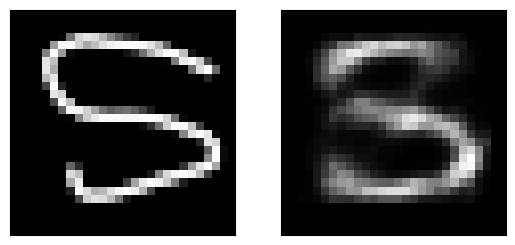

In [22]:
from PIL import Image
import numpy as np
import tensorflow as tf

from tensorflow.keras.preprocessing import image
updated_model = keras.models.load_model('autoencoder_new.h5')


####################################
# load a sample image
image = tf.keras.utils.load_img('Sumanth_1.png', target_size=(28, 28), color_mode = "grayscale")
image2=tf.keras.utils.load_img('Sumanth_2.png',target_size=(28, 28), color_mode = "grayscale")
image3=tf.keras.utils.load_img('Sumanth_3.png',target_size=(28, 28), color_mode = "grayscale")
image4=tf.keras.utils.load_img('Sumanth_4.png',target_size=(28, 28), color_mode = "grayscale")
image5=tf.keras.utils.load_img('Sumanth_5.png',target_size=(28, 28), color_mode = "grayscale")
####################################
# predict an image from this sample
input_arr = tf.keras.utils.img_to_array(image)
input_arr=tf.keras.utils.img_to_array(image2)
input_arr=tf.keras.utils.img_to_array(image3)
input_arr=tf.keras.utils.img_to_array(image4)
input_arr=tf.keras.utils.img_to_array(image5)
input_arr = input_arr/ 255 # normalize between 0 and 1
input_arr = input_arr.reshape(784)
input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it

predictions = updated_model.predict(input_arr)
print(predictions.shape)


#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image5, cmap="gray")


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions[0].reshape(28,28), cmap="gray")


plt.show()



In [23]:
from tensorflow import keras

# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

input_arr = input_arr.reshape(784)

np.random.shuffle(train_images)

bad_images = [input_arr for _ in range(5000)]
new_image_set = np.vstack((train_images[:50000], bad_images))
np.random.shuffle(new_image_set)

new_images_train = new_image_set[int(len(new_image_set)*.8):]
new_images_test = new_image_set[int(len(new_image_set)*.2):]

from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training

# Train the autoencoder with MNIST data
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = updated_model.fit(
    x=new_images_train, # For autoencoders, both the input and the target are the same
    y=new_images_train, 
    epochs=50, 
    batch_size=128,
    shuffle=True, 
    validation_data=(new_images_test, new_images_test),
    callbacks=[early_stop]
)

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)
Epoch 1/50
86/86 [==============================] - 3s 33ms/step - loss: 0.0988 - val_loss: 0.0966
Epoch 2/50
86/86 [==============================] - 3s 32ms/step - loss: 0.0961 - val_loss: 0.0962
Epoch 3/50
86/86 [==============================] - 3s 31ms/step - loss: 0.0955 - val_loss: 0.0965
Epoch 4/50
86/86 [==============================] - 3s 31ms/step - loss: 0.0947 - val_loss: 0.0962
Epoch 5/50
86/86 [==============================] - 3s 31ms/step - loss: 0.0941 - val_loss: 0.0962
Epoch 6/50
86/86 [==============================] - 3s 31ms/step - loss: 0.0937 - val_loss: 0.0960
Epoch 7/50
86/86 [==============================] - 3s 30ms/step - loss: 0.0933 - val_loss: 0.0961
Epoch 8/50
86/86 [==============================] - 3s 32ms/step - loss: 0.0929 - val_loss: 0.0960
Epoch 9/50
86/86 [==============================] - 3s 31ms/step - loss: 0.0926 - val_loss: 0.0962
Epoch 10/50
86/86 [==============================] 

313/313 [==============================] - 1s 3ms/step


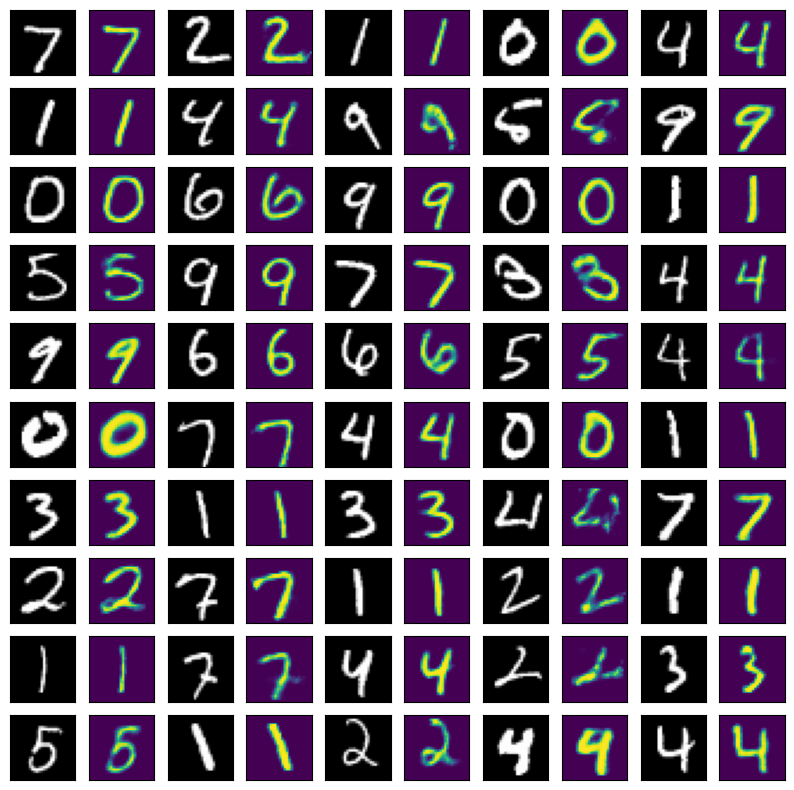

In [24]:
reconstructed_images = updated_model.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

1/1 [==============================] - 0s 24ms/step
(1, 784)


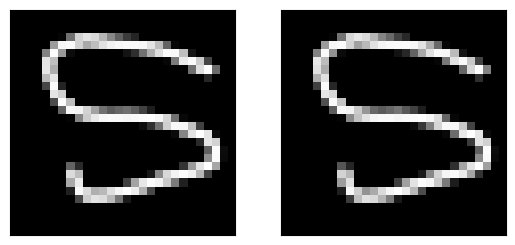

In [25]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image


####################################
# load a sample image



image = tf.keras.utils.load_img('Sumanth_1.png', target_size=(28, 28), color_mode = "grayscale")

image2=tf.keras.utils.load_img('Sumanth_2.png',target_size=(28, 28), color_mode = "grayscale")
image3=tf.keras.utils.load_img('Sumanth_3.png',target_size=(28, 28), color_mode = "grayscale")
image4=tf.keras.utils.load_img('Sumanth_4.png',target_size=(28, 28), color_mode = "grayscale")
image5=tf.keras.utils.load_img('Sumanth_5.png',target_size=(28, 28), color_mode = "grayscale")
####################################
# predict an image from this sample
input_arr = tf.keras.utils.img_to_array(image)
input_arr=tf.keras.utils.img_to_array(image2)
input_arr=tf.keras.utils.img_to_array(image3)
input_arr=tf.keras.utils.img_to_array(image4)
input_arr=tf.keras.utils.img_to_array(image5)

####################################
# predict an image from this sample
input_arr = input_arr/ 255 # normalize between 0 and 1
input_arr = input_arr.reshape(784)
input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it

predictions = updated_model.predict(input_arr)
print(predictions.shape)


#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image5, cmap="gray")





plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions.reshape(28,28), cmap="gray")


plt.show()


new autoencoder has shown significant improvement in its ability to identify both letters/alphabets and digits. With this development, the autoencoder has become more effective at recognizing and reconstructing these characters from input data.